In [2]:
import pandas as pd
import sklearn

### `Notes`
- Cleaning & Tranformatic visualization
- Prepare for Training
- Training
- Evaluation of Trained Model
- Inference/Prediction


In [3]:
data_path="lr-Real-estate.csv"

In [4]:
import os
os.path.exists(data_path)

True

In [9]:
df=pd.read_csv(data_path)
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [10]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [12]:
df=df.drop(['No', 'X1 transaction date'],axis=1)
df.head(2)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2


In [13]:
df.isna().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [17]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [18]:
import matplotlib.pyplot as plt

In [19]:
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [30]:
house_age=df['X2 house age'].to_numpy()
house_age

array([32. , 19.5, 13.3, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,
        6.3, 13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5,
       14.7, 10.1, 39.6, 29.3,  3.1, 10.4, 19.2,  7.1, 25.9, 29.6, 37.9,
       16.5, 15.4, 13.9, 14.7, 12. ,  3.1, 16.2, 13.6, 16.8, 36.1, 34.4,
        2.7, 36.6, 21.7, 35.9, 24.2, 29.4, 21.7, 31.3, 32.1, 13.3, 16.1,
       31.7, 33.6,  3.5, 30.3, 13.3, 11. ,  5.3, 17.2,  2.6, 17.5, 40.1,
        1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,  6.8, 12.3, 35.9,
       20.5, 38.2, 18. , 11.8, 30.8, 13.2, 25.3, 15.1,  0. ,  1.8, 16.9,
        8.9, 23. ,  0. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4,
        6.4, 17.5, 12.7,  1.1,  0. , 32.7,  0. , 17.2, 12.2, 31.4,  4. ,
        8.1, 33.3,  9.9, 14.8, 30.6, 20.6, 30.9, 13.6, 25.3, 16.6, 13.3,
       13.6, 31.5,  0. ,  9.9,  1.1, 38.6,  3.8, 41.3, 38.5, 29.6,  4. ,
       26.6, 18. , 33.4, 18.9, 11.4, 13.6, 10. , 12.9, 16.2,  5.1, 19.8,
       13.6, 11.9,  2.1,  0. ,  3.2, 16.4, 34.9, 35

C:\Users\atulm\AppData\Local\Temp\ipykernel_4980\949648474.py:8: RuntimeWarning: divide by zero encountered in log
  plt.hist(np.where(house_age>0,np.log(house_age),house_age), bins=30)
C:\Users\atulm\AppData\Local\Temp\ipykernel_4980\949648474.py:8: RuntimeWarning: invalid value encountered in log
  plt.hist(np.where(house_age>0,np.log(house_age),house_age), bins=30)


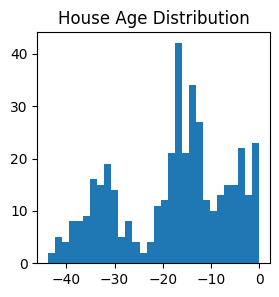

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# house_age=-1*house_age

# Plot histogram
plt.figure(figsize=(3, 3))
plt.hist(np.where(house_age>0,np.log(house_age),house_age), bins=30)
plt.title('House Age Distribution')
plt.show()


In [42]:
df['X2 house age']=df['X2 house age'].apply(np.sqrt)

In [43]:
df['X2 house age'].head()

0    2.378414
1    2.101400
2    1.909690
3    1.909690
4    1.495349
Name: X2 house age, dtype: float64

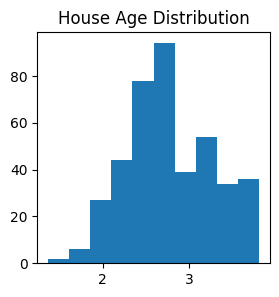

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# house_age=-1*house_age

# Plot histogram
plt.figure(figsize=(3, 3))
plt.hist(
    df['X3 distance to the nearest MRT station'].apply(np.log10)
    # df['X3 distance to the nearest MRT station']
    )
plt.title('House Age Distribution')
plt.show()


In [41]:
df['X3 distance to the nearest MRT station']=(
    df['X3 distance to the nearest MRT station'].apply(np.log10)
)

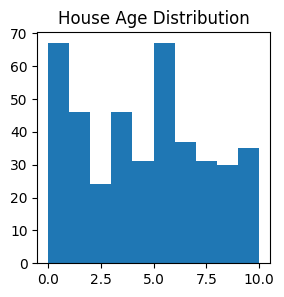

In [47]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.hist(
   df['X4 number of convenience stores']
    )
plt.title('House Age Distribution')
plt.show()


In [50]:
x=df.drop(['Y house price of unit area'],axis=1)
y=df['Y house price of unit area']

### Independedt-Dependent Split

### Data Split
- Train Split
- Test Split


In [48]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
X_train.shape,y_train.shape

((331, 5), (331,))

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr_model=LinearRegression()

In [58]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [59]:
predictions=lr_model.predict(X_test)

In [60]:
predictions.shape

(83,)

In [61]:
d={
    'GT':y_test,
    'predictions':predictions
}
comparision_df=pd.DataFrame(d)
comparision_df.head(15)

,GT,predictions
358,45.1,50.241087
350,42.3,38.600905
373,52.2,54.598455
399,37.3,45.877557
369,22.8,26.544768
72,36.3,41.097659
262,53.0,46.282843
140,51.4,46.226771
93,16.1,23.670577
70,59.0,55.301083


In [63]:
from sklearn.metrics import root_mean_squared_error

In [3]:
[1,2,3]
[1,2,3]+1

TypeError: can only concatenate list (not "int") to list

In [4]:
import numpy as np
np.array([1,2,3])+1

array([2, 3, 4])